# Piechart Figures
- The first figure shows the breakdown of each module's synaptic connection location on the oviIN neuron body. This gives us an idea of how the modularity sorts the pre-synaptic connectome
- The second figure shows where all the synapses in the pre-synaptic connectome are made, broken down by the module that the pre-synaptic neuron is sorted into at 0.0 resolution

This file is easily adjusted to any dataset in the v1.2.1.

Written by Rhessa Weber Langstaff

In [2]:
# Imports
import os
import time
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
from neuprint import Client
from neuprint import fetch_synapse_connections, NeuronCriteria as NC, fetch_all_rois, fetch_primary_rois, fetch_adjacencies
from neuprint import fetch_roi_hierarchy, fetch_mean_synapses, SynapseCriteria as SC, fetch_simple_connections

#auth_token_file = open("/Users/rweberla/flybrain-clustering-rhessa/flybrain.auth.txt", 'r') # need file containing the authentication token
auth_token_file = open("flybrain.auth.txt", 'r') # need file containing the authentication token
auth_token = next(auth_token_file).strip()
try:
    np_client = Client('neuprint.janelia.org', dataset='hemibrain:' + 'v1.2.1', token=auth_token)
    np_client.fetch_version()
except:
    np_client = None

Read in dataframe with super, L1, L2, L3, and L4. Created this file by following the output of the fetch_roi_hierarchy function. Super column is larger functional groups that we decided using Nomenclature paper (link). {{Please explain what the dfferent levels correspond to and which level(s) correspond to Primary ROIs in Neuprint.}}

In [4]:
roi_df = pd.read_excel('data/all_roi_df.xlsx')
roi_df

,Super,Super_split,L1,L2,L3,L4,Color,Color2
0,AL,AL(L),AL(L),AL(L),NaN,NaN,cadetblue,NaN
1,AL,NaN,NaN,AL-D(L),NaN,NaN,NaN,cadetblue
2,AL,NaN,NaN,AL-DA2(L),NaN,NaN,NaN,cadetblue
3,AL,NaN,NaN,AL-DA3(L),NaN,NaN,NaN,cadetblue
4,AL,NaN,NaN,AL-DA4m(L),NaN,NaN,NaN,cadetblue
...,...,...,...,...,...,...,...,...
225,VMNP,NaN,NaN,VES(L),NaN,NaN,NaN,firebrick
226,VMNP,NaN,NaN,VES(R),NaN,NaN,NaN,firebrick
227,AL,AL(L),mALT(L),mALT(L),NaN,NaN,cadetblue,NaN
228,AL,AL(R),mALT(R),mALT(R),NaN,NaN,cadetblue,NaN


The modularity dataframe is read in here because we'll only use the neurons that are part of oviINr's input subconnectome for this analysis. Alternatively, we could grab only the Traced, non-cropped neurons that make at least 3 synapse connections onto oviINr. For this first pie/barchart, we will use all the neurons from the modularity analysis which includes all presynaptic neurons of any connection strength to oviIN_R (except for a couple that fell out of the modularity analysis because they made no connections to anything in the subconnectome).

In [5]:
# Adjust dataset here
direct = "modularity_runs/0.0/"
filename = "0-0_98765.txt"

ins_r = pd.read_csv(os.path.join(direct, filename), sep=" ", header=None, names=["id", "0.0"])
ins_r

,id,0.0
0,1003215282,1
1,1005952640,2
2,1006928515,3
3,1007260806,3
4,1008024276,4
...,...,...
1827,987117151,2
1828,987273073,6
1829,988567837,5
1830,988909130,5


In [6]:
# body IDs of oviINs from Neuprint
oviINr_bodyID = 423101189
oviINl_bodyID = 485934965

In [7]:
# Fetch synaptic connections to the oviINr, can take around 30 seconds and sometimes times out
ids = ins_r["id"]

roi_info = fetch_synapse_connections(NC(bodyId=ids), NC(bodyId=oviINr_bodyID), batch_size=1000)
roi_info

  0%|          | 0/18782 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

,bodyId_pre,bodyId_post,roi_pre,roi_post,x_pre,y_pre,z_pre,x_post,y_post,z_post,confidence_pre,confidence_post
0,796889169,423101189,SMP(R),SMP(R),23373,32251,13044,23358,32282,13050,0.990,0.469301
1,796889169,423101189,SMP(R),SMP(R),22244,27537,12483,22226,27529,12490,0.792,0.617000
2,800588608,423101189,SMP(R),SMP(R),22806,30682,12514,22806,30692,12487,0.968,0.673414
3,796755936,423101189,SMP(R),SMP(R),21571,35158,14105,21564,35145,14113,0.983,0.997687
4,796755936,423101189,SMP(R),SMP(R),23040,31908,12238,23021,31907,12242,0.964,0.993469
...,...,...,...,...,...,...,...,...,...,...,...,...
18777,821686394,423101189,IB,IB,24215,16528,21699,24219,16526,21672,0.718,0.985000
18778,821686394,423101189,VES(R),VES(R),23040,22648,28280,23057,22666,28260,0.910,0.534000
18779,821686394,423101189,VES(R),VES(R),23042,22640,28253,23057,22664,28259,0.785,0.465808
18780,821686394,423101189,VES(R),VES(R),23202,23713,28967,23218,23729,28967,0.862,0.898703


In [ ]:
# alternatively, can load ovi_pre_syns.csv from the data folder (beware, it's slightly different depending on which pre-synaptic neurons are included above)
ovi_pre_syns = pd.read_csv("data/ovi_pre_syns.csv")

# grab oviINr synapse sites corresponding to traced, non-cropped neurons from sub-connectome
roi_info = ovi_pre_syns[ovi_pre_syns['bodyId_pre'].isin(ins_r['id'])]
roi_info

,bodyId_pre,bodyId_post,roi_pre,roi_post,x_pre,y_pre,z_pre,x_post,y_post,z_post,confidence_pre,confidence_post,type_pre,type_post
0,989228019,423101189,CRE(R),CRE(R),22857,34611,17485,22825,34624,17464,0.998,0.633171,FB5V,oviIN
1,988909130,423101189,CRE(R),CRE(R),19523,31096,21707,19509,31112,21693,0.969,0.528840,FB5V,oviIN
2,988567837,423101189,LAL(R),LAL(R),23100,27659,23824,23074,27659,23801,0.970,0.459446,FB4G,oviIN
4,987273073,423101189,CRE(R),CRE(R),19347,27826,15348,19351,27806,15376,0.943,0.595921,NaN,oviIN
5,987117151,423101189,LAL(R),LAL(R),19040,26341,22369,19033,26342,22353,0.937,0.960607,LAL010,oviIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21619,1006928515,423101189,IB,IB,22664,14840,19749,22651,14823,19757,0.994,0.865103,CL300,oviIN
21620,1005952640,423101189,IB,IB,21998,15625,18990,22007,15603,18991,0.996,0.929040,IB058,oviIN
21621,1005952640,423101189,IB,IB,22998,15275,23049,23014,15272,23060,0.835,0.780000,IB058,oviIN
21622,1005952640,423101189,IB,IB,23034,15380,23131,23048,15364,23146,0.986,0.905853,IB058,oviIN


# Synapses on oviIN breakdown

Here we pull all the connections made on the oviIN, specifically their super ROI grouping. These are grouped by coarse modularity cluster as well to determine whether modularity partitions correlate with locations of synaptic sites.

In [8]:
# Drop all unnecessary columns
roi_info_small = roi_info[['bodyId_pre', 'roi_post']]

# Collapse on roi_post and count the number of synapses in a new column called weight
roi_info_grouped = roi_info_small.groupby(['roi_post', 'bodyId_pre']).size().reset_index(name='weight')

# rename roi_post to roi
roi_info_grouped = roi_info_grouped.rename(columns = {'roi_post':'roi', 'bodyId_pre':'bodyId'})

In [9]:
# change weight to count
roi_info_grouped = roi_info_grouped.rename(columns = {'weight':'count'})

ins_r_e = pd.merge(ins_r, roi_info_grouped, left_on='id', right_on='bodyId', how='inner')

In [10]:
# get the roi dict for the super roi in ins_r_e
roi_ins_L2 = roi_df[roi_df['L2'].isin(ins_r_e['roi'].unique())]

roi_super_dict = roi_ins_L2.set_index('L2').to_dict()['Super']
roi_super_dict

{'ATL(R)': 'INP',
 'CRE(L)': 'INP',
 'CRE(R)': 'INP',
 'IB': 'INP',
 'LAL(R)': 'LX',
 'CAN(R)': 'PENP',
 'FLA(R)': 'PENP',
 'SIP(L)': 'SNP',
 'SMP(L)': 'SNP',
 'SIP(R)': 'SNP',
 'SMP(R)': 'SNP',
 'GOR(R)': 'VMNP',
 'SPS(R)': 'VMNP',
 'VES(R)': 'VMNP'}

In [11]:
# make a color dict for the super roi
color_dict = roi_ins_L2.set_index('Super').to_dict()['Color2']

In [12]:
# Parameters needed for plotting
clusters = ins_r_e["0.0"].unique()
super_title = 'OviINr Inputs Subconnectome Modules \nNeuropils of synaptic connections to oviINr'
label_threshold = 1
#color_dict = {'SNP': 'cornflowerblue', 'VMNP': 'firebrick', 'LX': 'blueviolet', 'INP': 'green'}
weight_threshold = 1
#plot_labels = ['a.', 'b.', 'c.', 'd.', 'e.', 'f.', 'g.']

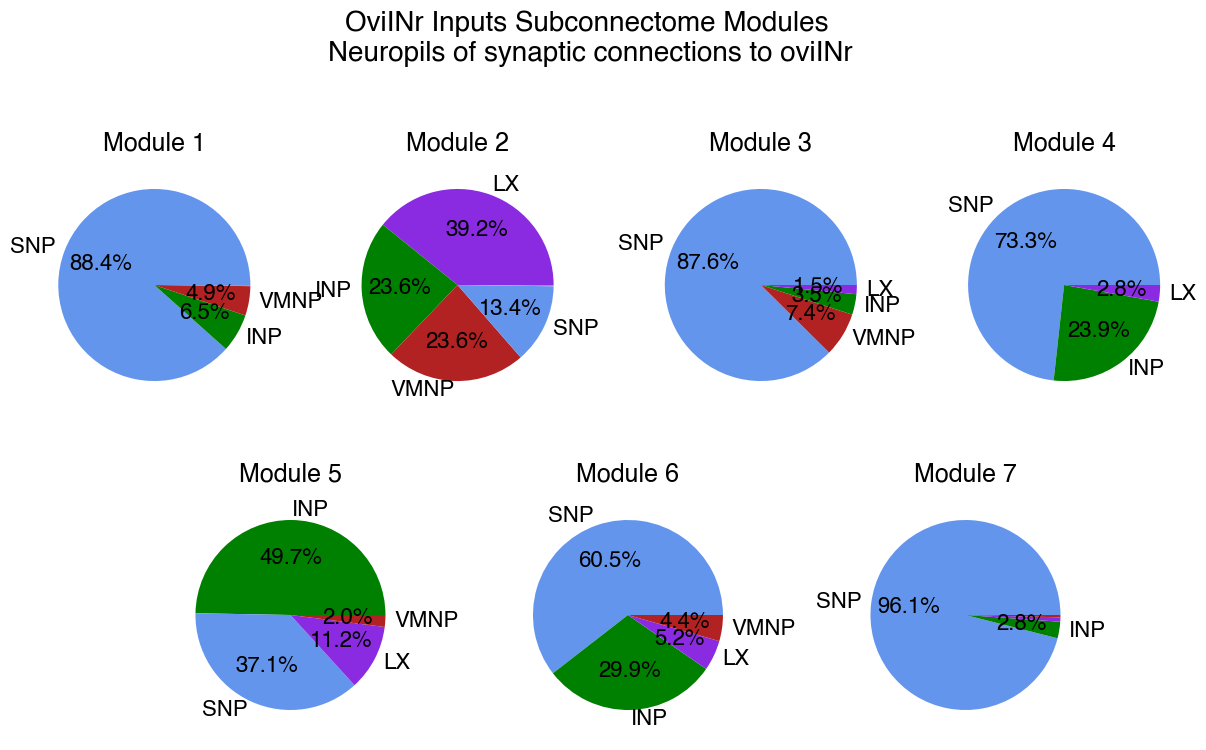

In [13]:
fig, ax = plt.subplots(2, 4, figsize=(15, 10))
plt.suptitle(super_title, fontsize=20)

for i in clusters: 
        roi_grouped = ins_r_e[ins_r_e['0.0'] == i].groupby('roi', as_index=False).agg({'count': 'sum'})
        
        # Assign preferred roi
        roi_grouped['super'] = roi_grouped['roi'].map(roi_super_dict).fillna(roi_grouped['roi'])
        roi_grouped = roi_grouped.drop(columns=['roi'])

        # Add up total weight for the super roi
        roi_grouped = roi_grouped.groupby('super', as_index=False).agg({'count':'sum'})  
        # thresholding out weights equal to or less than 1 and sort
        roi_total = roi_grouped[roi_grouped['count'] > 1].sort_values(by='count', ascending=False)

        # Assign color
        roi_total['color'] = roi_total['super'].map(color_dict).fillna('black')
        
        # Filter roi_total by weight_threshold and sort by total in descending order (might not need to do this but just in case)
        data = roi_total[roi_total['count'] > weight_threshold].sort_values(by='count', ascending=False)
    
        # plot pie chart by value counts without none
        w, text, at = ax[int((i-1)/int(len(clusters)/1.5)), (i-1)%int(len(clusters)/1.5)].pie(data['count'], labels = data['super'], colors = data['color'], autopct='%.1f%%',textprops={'fontsize': 16},radius=0.95, startangle=0)
        for t, x in enumerate(at):
            # Convert third part of x from string to float
            z = float(x.get_text().split()[0][:-1])
            if z <= label_threshold:
                    text[t].set_text('')
                    at[t].set_text('')
        ax[int((i-1)/int(len(clusters)/1.5)), (i-1)%int(len(clusters)/1.5)].set_title('Module ' + str(i), fontsize=18)
        #ax[int((i-1)/int(len(clusters)/1.5)), (i-1)%int(len(clusters)/1.5)].set_title(plot_labels[i-1], fontweight='bold', loc='left', fontsize=16)

# Adjust subplot dimensions if number of clusters is odd
if (len(clusters) % 2):
    fig.delaxes(ax[1, 3])
    # move bottom 3 axes to the middle
    ax[1, 0].set_position([0.05, 0.25, 0.5, 0.25])
    ax[1, 1].set_position([0.3, 0.25, 0.45, 0.25])
    ax[1, 2].set_position([0.55, 0.25, 0.4, 0.25])


In [20]:
# for making the legend nice
import matplotlib.patches as mpatches

# for making the legend nice
leg_ins_r_e = ins_r_e.copy()
leg_ins_r_e['super'] = leg_ins_r_e['roi'].map(roi_super_dict).fillna(leg_ins_r_e['roi'])
leg_ins_r_e = leg_ins_r_e.groupby('super', as_index=False).agg({'count': 'sum'}).sort_values(by='count', ascending=False)
leg_ins_r_e['color'] = leg_ins_r_e['super'].map(color_dict).fillna('black')

# create Patch objects for each entry, then pass those as handles along with your labels
handles = [mpatches.Patch(color=row['color'], label=row['super']) for _, row in leg_ins_r_e.iterrows()]

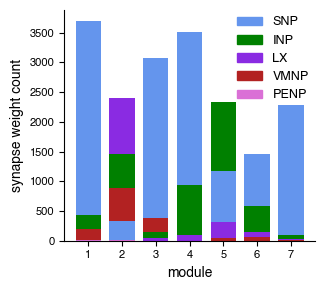

In [21]:
# Creating a stacked bar plot instead, each bar represents a module
fig, ax = plt.subplots(figsize=(3.35, 3))
# Set the figure title
#plt.suptitle("Synapse counts by neuropil for each module", fontsize=20)
# Set the width of the bars
bar_width = 0.75

for x in clusters:
    # Get the data for the current cluster
    roi_grouped = ins_r_e[ins_r_e['0.0'] == x].groupby('roi', as_index=False).agg({'count': 'sum'})
    #print(roi_grouped)
    # Assign supercategory to roi
    roi_grouped['super'] = roi_grouped['roi'].map(roi_super_dict).fillna(roi_grouped['roi'])
    roi_grouped = roi_grouped.drop(columns=['roi'])

    # Add up total weight for the super roi
    roi_grouped = roi_grouped.groupby('super', as_index=False).agg({'count':'sum'})  
    # thresholding out weights within a supercategory (optional) and sort
    roi_total = roi_grouped[roi_grouped['count'] > 1].sort_values(by='count', ascending=True)

    # Assign color
    roi_total['color'] = roi_total['super'].map(color_dict).fillna('black')
        
    # Filter roi_total by weight_threshold and sort by total in descending order (might not need to do this but just in case)
    data = roi_total[roi_total['count'] > weight_threshold].sort_values(by='count', ascending=True).reset_index(drop=True)
    #print(data)
    # plot a stacked bar 
    for i in data.index:
        if i == 0:
            ax.bar(x, data['count'][i], color=data['color'][i], label=data['super'][i], width=bar_width)
        else:
            # stack the bar ontop of the previous total plotted
            ax.bar(x, data['count'][i], color=data['color'][i], label=data['super'][i], bottom=data['count'][:i].sum(), width=bar_width)

   # label sections of the bar with the percentage
    #for i in data.index:
        # Calculate the percentage
        #percent = (data['count'][i] / data['count'].sum()) * 100
        #if percent >4.5:
            # Add the percentage label to the bar
        #    ax.text(x+.43, data['count'][:i].sum() + data['count'][i] / 2, f'{percent:.1f}%', ha='center', va='center', fontsize=8)

# Only display the unique labels in the legend
ax.legend(handles=handles, loc='upper right')

# Set the x-axis labels
ax.set_xlabel('module')
ax.set_xticks(clusters, labels=clusters)
# Set the y-axis label
ax.set_ylabel('synapse weight count')

fig.tight_layout()

In [25]:
fig.savefig('figures/oviINr_inputs_ROI.pdf', bbox_inches='tight')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


In [83]:
fig.savefig("figures/roibreakdown_ovi_conns_bar.svg", format="svg")

# Portionality Plot

We want to see how the input connectome's synapses breakdown by cluster. This is done by finding the portion of connections an input neuron makes in each supercategory ROI compared to all the connections it makes. This is then added up as total portions. Here, we restrict the analysis to the Traced, non-cropped neurons that make at least 3 synapse connections onto oviIN_R. Because the point of this analysis is to see what kind of neurons end up in which modules and where their inputs come from, it makes sense to restrict the neurons analyzed so that incomplete/cropped neurons and potentially fake partners don't skew the results. 

We do two versions of this plot below. The first version quantifies only the ROIs of the inputs to oviINr's inputs. The second version quantifies the ROIs of both inputs and outputs to oviINr's inputs.

In [15]:
# alternate dataset: the traced, non-cropped neurons that make at least 3 synapses onto oviIN_R
chosen_inputs, _ = fetch_adjacencies(NC(status='Traced', cropped=False), NC(bodyId=oviINr_bodyID), min_total_weight=3)

# remove the first entry which is oviIN
chosen_inputs = chosen_inputs[1:].copy()

In [16]:
# grab rows of ins_r that are in chosen_inputs
ins_r = ins_r[ins_r['id'].isin(chosen_inputs['bodyId'])].copy()

In [18]:
# Pull presynpatic neurons outputs and input connections, takes about a minute
ids = ins_r["id"]
_, roi_info_p = fetch_adjacencies(NC(bodyId=ids), None)

_, roi_info_in_p = fetch_adjacencies(None, NC(bodyId=ids))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

The option to drop one or both oviINs from the inputs and outputs of the oviIN inputs is below. This did not make a significant difference in the results.

In [ ]:
# remove oviINr and oviINl from the presynaptic neurons
roi_info_p = roi_info_p[roi_info_p['bodyId_post'] != oviINr_bodyID]
roi_info_p = roi_info_p[roi_info_p['bodyId_post'] != oviINl_bodyID]
roi_info_in_p = roi_info_in_p[roi_info_in_p['bodyId_pre'] != oviINr_bodyID]
roi_info_in_p = roi_info_in_p[roi_info_in_p['bodyId_pre'] != oviINl_bodyID]

In [51]:
# grab only the columns we need
roi_out = roi_info_p[['bodyId_pre', 'roi', 'weight']]
roi_in = roi_info_in_p[['bodyId_post', 'roi', 'weight']]

In [52]:
# create roi dictionaries for mapping
L2rois = roi_df.set_index('L2')['Super'].dropna().to_dict()
L3rois = roi_df.set_index('L3')['Super'].dropna().to_dict()

# combine the two dictionaries
roi_super_dict = L2rois
roi_super_dict.update(L3rois)

In [53]:
# merge the supercateries onto these dataframes
roi_out['super'] = roi_out['roi'].map(roi_super_dict).fillna(roi_out['roi'])
roi_in['super'] = roi_in['roi'].map(roi_super_dict).fillna(roi_in['roi'])

In [54]:
roi_out

,bodyId_pre,roi,weight,super
0,266187559,SMP(R),1,SNP
1,266187559,SLP(R),1,SNP
2,266187559,SMP(R),1,SNP
3,266187559,SMP(R),2,SNP
4,266187559,SMP(R),1,SNP
...,...,...,...,...
481172,7112622044,CRE(L),1,INP
481173,7112622044,SMP(L),1,SNP
481174,7112622044,SMP(R),2,SNP
481175,7112622044,CRE(R),1,INP


In [55]:
# drop the roi column from both dataframes
roi_out = roi_out.drop(columns=['roi'])
roi_in = roi_in.drop(columns=['roi'])

## ROI portionality of inputs to oviINr's inputs

In [56]:
# collapse on super roi per bodyId and sum the weights
super_roi_in =  roi_in.groupby(['bodyId_post', 'super']).agg({'weight':'sum'}).reset_index()

In [57]:
# create a column that will contain the total number of synapses made by a bodyID
super_roi_in['total'] = super_roi_in.groupby('bodyId_post')['weight'].transform('sum')

In [ ]:
# I will then create a new column that will contain the fraction of synapses made in an roi
# over the total number of synapses made by that bodyID
super_roi_in['fraction'] = super_roi_in['weight'] / super_roi_in['total']

super_roi_in

,bodyId_post,super,weight,total,fraction
0,266187559,LH,4,643,0.006221
1,266187559,SNP,639,643,0.993779
2,267214250,INP,165,2924,0.056430
3,267214250,NotPrimary,3,2924,0.001026
4,267214250,SNP,2749,2924,0.940150
...,...,...,...,...,...
4081,7112622044,LX,740,1938,0.381837
4082,7112622044,MB,2,1938,0.001032
4083,7112622044,NotPrimary,4,1938,0.002064
4084,7112622044,SNP,309,1938,0.159443


In [67]:
# Input modularity data for oviINr merged with the roi portionality data
in_r_p = pd.merge(ins_r, super_roi_in, left_on='id', right_on='bodyId_post', how='inner')
in_r_p

,id,0.0,bodyId_post,super,weight,total,fraction
0,1005952640,2,1005952640,INP,1263,1943,0.650026
1,1005952640,2,1005952640,NotPrimary,1,1943,0.000515
2,1005952640,2,1005952640,VLNP,62,1943,0.031909
3,1005952640,2,1005952640,VMNP,617,1943,0.317550
4,1007260806,3,1007260806,INP,113,205,0.551220
...,...,...,...,...,...,...,...
4081,987117151,2,987117151,LX,3728,5457,0.683159
4082,987117151,2,987117151,NotPrimary,7,5457,0.001283
4083,987117151,2,987117151,SNP,81,5457,0.014843
4084,987117151,2,987117151,VLNP,173,5457,0.031702


In [76]:
# Set color maps
color_dict = roi_df.set_index('Super')['Color'].dropna().to_dict()

In [176]:
import matplotlib.patches as mpatches

# for making the legend nice
leg_in_r_p = in_r_p.groupby('super', as_index=False).agg({'weight': 'sum'}).sort_values(by='weight', ascending=False)
leg_in_r_p['color'] = leg_in_r_p['super'].map(color_dict).fillna('black')

# create Patch objects for each entry, then pass those as handles along with your labels
handles = [mpatches.Patch(color=row['color'], label=row['super']) for _, row in leg_in_r_p.iterrows()]

In [155]:
leg_in_r_p

,super,weight,color
10,SNP,737304,cornflowerblue
3,INP,313067,green
1,CX,141509,salmon
5,LX,126316,blueviolet
11,VLNP,101625,orange
6,MB,89739,tan
12,VMNP,75790,firebrick
4,LH,8123,teal
0,AL,5421,cadetblue
9,PENP,3335,orchid


In [156]:
len(leg_in_r_p)

13

Text(0, 0.5, 'Fraction of Synapses')

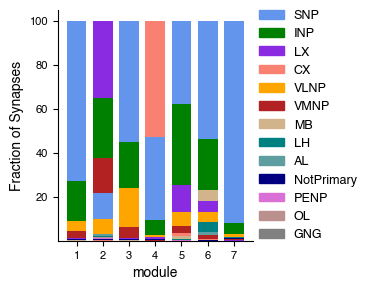

In [163]:
# create stacked bar plot instead, each bar represents a module
fig, ax = plt.subplots(figsize=(3.35, 3)) #(4.57,3))
# Set the figure title
#plt.suptitle("Composition of connections for module neurons", fontsize=20)
# Set the width of the bars
bar_width = 0.75

for x in clusters:
    # Get the data for the current cluster
    roi_grouped = in_r_p[in_r_p['0.0'] == x]#.groupby('roi', as_index=False).agg({'fraction': 'sum'})

    # Add up total weight for the super roi
    roi_total = roi_grouped.groupby('super', as_index=False).agg({'fraction':'sum'})  

    # Assign color
    roi_total['color'] = roi_total['super'].map(color_dict).fillna('black')
        
    # Filter roi_total by weight_threshold and sort by total in descending order (might not need to do this but just in case)
    data = roi_total.sort_values(by='fraction', ascending=True).reset_index(drop=True)

    # plot a stacked bar 
    for i in data.index:
        if i == 0:
            percent = ((data['fraction'][i] / data['fraction'].sum()) * 100)
            #print(percent)
            ax.bar(x, percent, color=data['color'][i], label=data['super'][i], width=bar_width)
        else:
            # stack the bar ontop of the previous total plotted
            percent = (data['fraction'][i] / data['fraction'].sum()) * 100
            #print(percent)
            ax.bar(x, percent, color=data['color'][i], label=data['super'][i], bottom=(data['fraction'][:i].sum() / data['fraction'].sum()) * 100, width=bar_width)

   # label sections of the bar with the percentage
    #for i in data.index:
        # Calculate the percentage
        #percent = (data['fraction'][i] / data['fraction'].sum()) * 100
        #if percent > 4:
            # Add the percentage label to the bar
         #   ax.text(x+.43, (percent / 2) + (data['fraction'][:i].sum() / data['fraction'].sum()) * 100, f'{percent:.1f}%', ha='center', va='center', fontsize=15)

# Shrink the axes width to make space on the right for the legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])  # 0.75 leaves 25% for the legend

# Place the legend outside the axes, but inside the figure
ax.legend(
    handles=handles,  # Use the handles created above
    loc='center left',
    bbox_to_anchor=(1, 0.5),  # (x, y) in axes coordinates; x=1 is just outside the axes
    borderaxespad=0.5,
)
ax.set_xlabel('module')
ax.set_xticks(clusters, labels=clusters)
ax.set_ylabel('Fraction of Synapses')

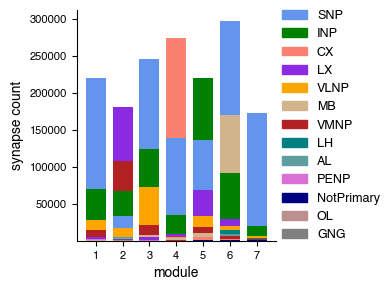

In [177]:
# Creating a stacked bar plot instead, each bar represents a module
fig, ax = plt.subplots(figsize=(3.35, 3)) #(4.57,3))
# Set the figure title
#plt.suptitle("Synapse counts by neuropil for each module (all connections)", fontsize=20)
# Set the width of the bars
bar_width = 0.75

for x in clusters:
    # Get the data for the current cluster
    roi_grouped = in_r_p[in_r_p['0.0'] == x]#.groupby('roi', as_index=False).agg({'count': 'sum'})

    # Add up total weight for the super roi
    roi_total = roi_grouped.groupby('super', as_index=False).agg({'weight':'sum'})  

    # Assign color
    roi_total['color'] = roi_total['super'].map(color_dict).fillna('black')
        
    # Filter roi_total by weight_threshold and sort by total in descending order (might not need to do this but just in case)
    data = roi_total.sort_values(by='weight', ascending=True).reset_index(drop=True)

    # plot a stacked bar 
    for i in data.index:
        if i == 0:
            ax.bar(x, data['weight'][i], color=data['color'][i], label=data['super'][i], width=bar_width)
        else:
            # stack the bar ontop of the previous total plotted
            ax.bar(x, data['weight'][i], color=data['color'][i], label=data['super'][i], bottom=data['weight'][:i].sum(), width=bar_width)

   # label sections of the bar with the percentage
    #for i in data.index:
        # Calculate the percentage
        #percent = (data['weight'][i] / data['weight'].sum()) * 100
        #if percent > 10:
            # Add the percentage label to the bar
            #ax.text(x+.43, data['weight'][:i].sum() + data['weight'][i] / 2, f'{percent:.1f}%', ha='center', va='center')

# Shrink the axes width to make space on the right for the legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])  # 0.75 leaves 25% for the legend

# Place the legend outside the axes, but inside the figure
ax.legend(
    handles=handles,  # Use the handles created above
    loc='center left',
    bbox_to_anchor=(1, 0.5),  # (x, y) in axes coordinates; x=1 is just outside the axes
    borderaxespad=0.5,
)

# Set the x-axis labels
ax.set_xlabel('module')
ax.set_xticks(clusters, labels=clusters)
# Set the y-axis label
ax.set_ylabel('synapse count')

fig.tight_layout()

In [179]:
fig.savefig('figures/roibreakdown_oviINr_conns_in_counts.pdf', bbox_inches='tight')

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


## ROI portionality of inputs and outputs to oviINr's inputs

In [119]:
# rename columns to allow concatenation
roi_out = roi_out.rename(columns = {'bodyId_pre':'bodyId'})
roi_in = roi_in.rename(columns = {'bodyId_post':'bodyId'})

# Combine input and output roi info
roi_both = pd.concat([roi_out, roi_in], axis=0)
roi_both

,bodyId,weight,super
0,266187559,1,SNP
1,266187559,1,SNP
2,266187559,1,SNP
3,266187559,2,SNP
4,266187559,1,SNP
...,...,...,...
479910,392821837,1,SNP
479911,485628489,1,SNP
479912,574511458,1,SNP
479913,733182574,2,SNP


For each bodyID i want to get a fraction of how many synapses (weight) were made in an roi over the total number of synapses made by that bodyID and put that portionality in a new column.

In [ ]:
# collapse on super roi per bodyId and sum the weights
super_roi_both =  roi_both.groupby(['bodyId', 'super']).agg({'weight':'sum'}).reset_index() 

# create a column that will contain the total number of synapses made by a bodyID
super_roi_both['total'] = super_roi_both.groupby('bodyId')['weight'].transform('sum')

# I will then create a new column that will contain the fraction of synapses made in an roi
# over the total number of synapses made by that bodyID
super_roi_both['fraction'] = super_roi_both['weight'] / super_roi_both['total']

In this next dataframe we can see the cluster each neuron belongs in, the super roi it falls into and the fraction of connections each neuron makes in that roi.

In [129]:
# Input modularity data for oviINr merged with the roi portionality data
in_r_both = pd.merge(ins_r, super_roi_both, left_on='id', right_on='bodyId', how='inner')
in_r_both

,id,0.0,bodyId,super,weight,total,fraction
0,1005952640,2,1005952640,INP,2781,3968,0.700857
1,1005952640,2,1005952640,NotPrimary,2,3968,0.000504
2,1005952640,2,1005952640,VLNP,80,3968,0.020161
3,1005952640,2,1005952640,VMNP,1105,3968,0.278478
4,1007260806,3,1007260806,INP,177,415,0.426506
...,...,...,...,...,...,...,...
4170,987117151,2,987117151,LX,5379,9162,0.587099
4171,987117151,2,987117151,NotPrimary,9,9162,0.000982
4172,987117151,2,987117151,SNP,92,9162,0.010041
4173,987117151,2,987117151,VLNP,307,9162,0.033508


In [157]:
import matplotlib.patches as mpatches

# for making the legend nice
leg_in_r_both = in_r_both.groupby('super', as_index=False).agg({'weight': 'sum'}).sort_values(by='weight', ascending=False)
leg_in_r_both['color'] = leg_in_r_both['super'].map(color_dict).fillna('black')

# create Patch objects for each entry, then pass those as handles along with your labels
handles = [mpatches.Patch(color=row['color'], label=row['super']) for _, row in leg_in_r_both.iterrows()]

Text(0, 0.5, 'Fraction of Synapses')

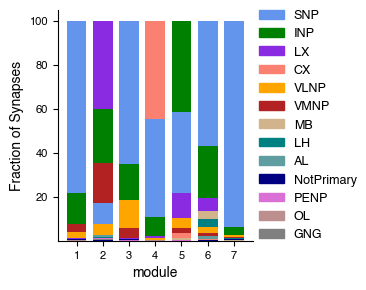

In [160]:
# create stacked bar plot instead, each bar represents a module
fig, ax = plt.subplots(figsize=(3.35, 3)) #(4.57,3))
# Set the figure title
#plt.suptitle("Composition of connections for module neurons", fontsize=20)
# Set the width of the bars
bar_width = 0.75

for x in clusters:
    # Get the data for the current cluster
    roi_grouped = in_r_both[in_r_both['0.0'] == x]#.groupby('roi', as_index=False).agg({'fraction': 'sum'})

    # Add up total weight for the super roi
    roi_total = roi_grouped.groupby('super', as_index=False).agg({'fraction':'sum'})  

    # Assign color
    roi_total['color'] = roi_total['super'].map(color_dict).fillna('black')
        
    # Filter roi_total by weight_threshold and sort by total in descending order (might not need to do this but just in case)
    data = roi_total.sort_values(by='fraction', ascending=True).reset_index(drop=True)

    # plot a stacked bar 
    for i in data.index:
        if i == 0:
            percent = ((data['fraction'][i] / data['fraction'].sum()) * 100)
            #print(percent)
            ax.bar(x, percent, color=data['color'][i], label=data['super'][i], width=bar_width)
        else:
            # stack the bar ontop of the previous total plotted
            percent = (data['fraction'][i] / data['fraction'].sum()) * 100
            #print(percent)
            ax.bar(x, percent, color=data['color'][i], label=data['super'][i], bottom=(data['fraction'][:i].sum() / data['fraction'].sum()) * 100, width=bar_width)

   # label sections of the bar with the percentage
    #for i in data.index:
        # Calculate the percentage
        #percent = (data['fraction'][i] / data['fraction'].sum()) * 100
        #if percent > 4:
            # Add the percentage label to the bar
         #   ax.text(x+.43, (percent / 2) + (data['fraction'][:i].sum() / data['fraction'].sum()) * 100, f'{percent:.1f}%', ha='center', va='center', fontsize=15)

# Shrink the axes width to make space on the right for the legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])  # 0.75 leaves 25% for the legend

# Place the legend outside the axes, but inside the figure
ax.legend(
    handles=handles,  # Use the handles created above
    loc='center left',
    bbox_to_anchor=(1, 0.5),  # (x, y) in axes coordinates; x=1 is just outside the axes
    borderaxespad=0.5,
)
ax.set_xlabel('module')
ax.set_xticks(clusters, labels=clusters)
ax.set_ylabel('Fraction of Synapses')

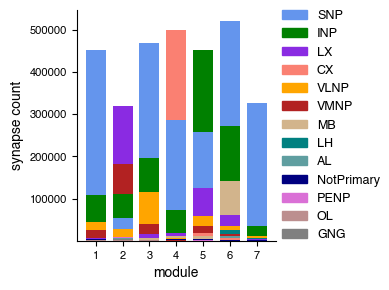

In [161]:
# Creating a stacked bar plot instead, each bar represents a module
fig, ax = plt.subplots(figsize=(3.35, 3)) #(4.57,3))
# Set the figure title
#plt.suptitle("Synapse counts by neuropil for each module (all connections)", fontsize=20)
# Set the width of the bars
bar_width = 0.75

for x in clusters:
    # Get the data for the current cluster
    roi_grouped = in_r_both[in_r_both['0.0'] == x]#.groupby('roi', as_index=False).agg({'count': 'sum'})

    # Add up total weight for the super roi
    roi_total = roi_grouped.groupby('super', as_index=False).agg({'weight':'sum'})  

    # Assign color
    roi_total['color'] = roi_total['super'].map(color_dict).fillna('black')
        
    # Filter roi_total by weight_threshold and sort by total in descending order (might not need to do this but just in case)
    data = roi_total.sort_values(by='weight', ascending=True).reset_index(drop=True)

    # plot a stacked bar 
    for i in data.index:
        if i == 0:
            ax.bar(x, data['weight'][i], color=data['color'][i], label=data['super'][i], width=bar_width)
        else:
            # stack the bar ontop of the previous total plotted
            ax.bar(x, data['weight'][i], color=data['color'][i], label=data['super'][i], bottom=data['weight'][:i].sum(), width=bar_width)

   # label sections of the bar with the percentage
    #for i in data.index:
        # Calculate the percentage
        #percent = (data['weight'][i] / data['weight'].sum()) * 100
        #if percent > 10:
            # Add the percentage label to the bar
            #ax.text(x+.43, data['weight'][:i].sum() + data['weight'][i] / 2, f'{percent:.1f}%', ha='center', va='center')

# Shrink the axes width to make space on the right for the legend
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.75, box.height])  # 0.75 leaves 25% for the legend

# Place the legend outside the axes, but inside the figure
ax.legend(
    handles=handles,  # Use the handles created above
    loc='center left',
    bbox_to_anchor=(1, 0.5),  # (x, y) in axes coordinates; x=1 is just outside the axes
    borderaxespad=0.5,
)

# Set the x-axis labels
ax.set_xlabel('module')
ax.set_xticks(clusters, labels=clusters)
# Set the y-axis label
ax.set_ylabel('synapse count')

fig.tight_layout()

This is showing the portion of connections an input neuron makes in each ROI compared to all the connections it makes. \
The roi are then adjusted into the Super ROI and added up as total portions.


This makes the numbers a little weird. For the first module for example, each super group adds up the proportions a neuron makes in that super group which means it can be more than 100. 

However in the piecharts they calculated the percentage of each super group out of all the added up proportions. So plotting every bar out of 100 actually describes the same thing.